# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 14:**  
Period = 9.6867825058   
tdepth = 0.0338109330**2
   
  - **Sector 19:**  
Period = 9.6867805729   
tdepth = 0.0372664207**2

  - **Sector 20:**  
Period = 9.6867183846  
tdepth = 0.0394154684**2

  - **Sector 21:**  
Period = 9.6867418247   
tdepth = 0.0374812687**2

  - **Sector 40:**  
Period = 9.6867918151  
tdepth = 0.0364001259**2

  - **Sector 41:**  
Period = 9.6867623433   
tdepth = 0.0385009013**2

  - **Sector 47:**  
Period = 9.6867394726  
tdepth = 0.0384975142**2

  - **Sector 48:**  
Period = 9.6867924148  
tdepth = 0.0367629468**2

In [2]:
ID = 158002130
sectors = np.array([14])

period = 9.6867825058
tdepth = 0.0338109330**2

lc = pd.read_csv("TOI_1180_14.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

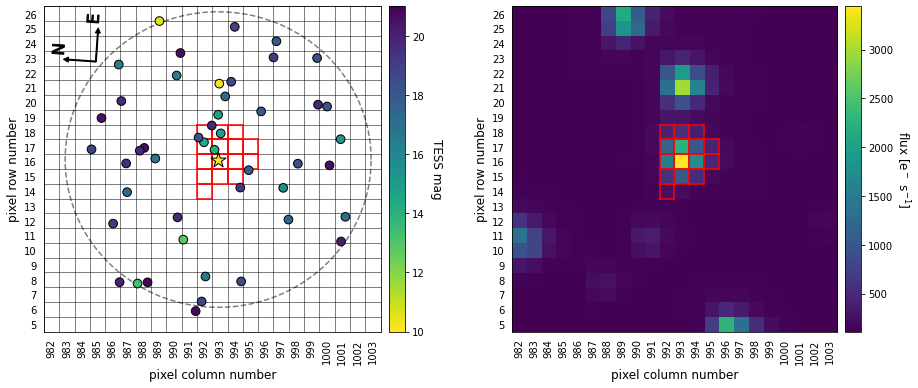

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,158002130,10.1120,9.237,8.716,8.594,214.553098,82.194044,0.750000,0.727165,4700.0,13.855400,0.000,0.000
1,158002133,14.1878,13.499,13.118,13.091,214.578979,82.195586,1.000000,1.720390,5659.0,0.606787,13.818,66.287
2,158002134,14.2774,13.514,13.125,13.008,214.598890,82.199596,NaN,NaN,NaN,NaN,30.009,48.209
3,158002129,14.8704,14.139,13.809,13.779,214.623066,82.193718,0.970000,0.925030,5536.0,0.874750,34.231,91.925
4,158002135,18.2779,16.431,15.866,15.677,214.611189,82.201675,NaN,NaN,NaN,NaN,39.505,45.913
5,1001640136,17.8058,NaN,NaN,NaN,214.525758,82.182679,NaN,NaN,5690.0,0.288843,43.042,198.121
6,1001640142,19.7873,NaN,NaN,NaN,214.643820,82.197148,NaN,NaN,NaN,0.933542,45.736,75.811
7,1001640139,19.2138,NaN,NaN,NaN,214.479027,82.185327,NaN,NaN,NaN,0.498295,47.937,229.144
8,158002131,14.7490,14.077,13.664,13.538,214.672870,82.195091,0.980000,1.880020,5559.0,0.437551,58.679,86.258
9,1001640135,17.9478,NaN,NaN,NaN,214.682963,82.179549,NaN,NaN,5506.0,0.203369,82.231,129.322


In [4]:
ap = np.array([[992, 14], [992, 15], [993, 15], [994, 15], [992, 16], 
               [993, 16], [994, 16], [995, 16], [992, 17], [993, 17], 
               [994, 17], [995, 17], [992, 18], [993, 18], [994, 18]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,158002130,10.1120,9.237,8.716,8.594,214.553098,82.194044,0.750000,0.727165,4700.0,13.855400,0.000,0.000,9.507800e-01,0.001202
1,158002133,14.1878,13.499,13.118,13.091,214.578979,82.195586,1.000000,1.720390,5659.0,0.606787,13.818,66.287,2.159832e-02,0.052929
2,158002134,14.2774,13.514,13.125,13.008,214.598890,82.199596,NaN,NaN,NaN,NaN,30.009,48.209,1.481325e-02,0.077173
3,158002129,14.8704,14.139,13.809,13.779,214.623066,82.193718,0.970000,0.925030,5536.0,0.874750,34.231,91.925,9.434726e-03,0.121167
4,158002135,18.2779,16.431,15.866,15.677,214.611189,82.201675,NaN,NaN,NaN,NaN,39.505,45.913,2.635227e-04,0.000000
5,1001640136,17.8058,NaN,NaN,NaN,214.525758,82.182679,NaN,NaN,5690.0,0.288843,43.042,198.121,4.119751e-04,0.000000
6,1001640142,19.7873,NaN,NaN,NaN,214.643820,82.197148,NaN,NaN,NaN,0.933542,45.736,75.811,6.441031e-05,0.000000
7,1001640139,19.2138,NaN,NaN,NaN,214.479027,82.185327,NaN,NaN,NaN,0.498295,47.937,229.144,5.356786e-05,0.000000
8,158002131,14.7490,14.077,13.664,13.538,214.672870,82.195091,0.980000,1.880020,5559.0,0.437551,58.679,86.258,2.468923e-03,0.463027
9,1001640135,17.9478,NaN,NaN,NaN,214.682963,82.179549,NaN,NaN,5506.0,0.203369,82.231,129.322,6.149763e-06,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

158002133
158002134
158002129
158002131


# Calculating FPP & NFPP

In [7]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 158002130.
Calculating EB and EBx2P scenario probabilities for 158002130.
Calculating PTP scenario probability for 158002130.
Calculating PEB and PEBx2P scenario probabilities for 158002130.
Calculating STP scenario probability for 158002130.
Calculating SEB and SEBx2P scenario probabilities for 158002130.
Calculating DTP scenario probability for 158002130.
Calculating DEB and DEBx2P scenario probabilities for 158002130.
Calculating BTP scenario probability for 158002130.
Calculating BEB and BEBx2P scenario probabilities for 158002130.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 158002133.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 158002134.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 158002129.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 158002131.
Wall time: 28min 41s


In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.00826978464106276
NFPP =  0.0007689192834435583


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,158002130,TP,0.750000,0.727165,9.686783,88.550380,0.384374,3.784541e-01,113.398253,3.013516,0.000000,0.000000,7.904357e-01
1,158002130,EB,0.750000,0.727165,9.686783,86.272280,1.938971,3.517849e-08,217.942606,0.000000,0.708469,0.727165,2.483659e-25
2,158002130,EBx2P,0.750000,0.727165,19.373565,88.365580,0.269431,8.659213e-01,162.563255,0.000000,0.728329,0.727165,1.247531e-07
3,158002130,PTP,0.750000,0.727165,9.686783,88.541990,0.374879,3.963910e-01,112.236169,3.059869,0.000000,0.000000,1.202280e-01
4,158002130,PEB,0.750000,0.727165,9.686783,87.482954,1.100721,2.040574e-03,339.605957,0.000000,0.113873,0.139052,1.471555e-24
5,158002130,PEBx2P,0.750000,0.727165,19.373565,88.074165,0.496733,7.526769e-01,148.677156,0.000000,0.717715,0.727165,7.472557e-11
6,158002130,STP,0.578696,0.584082,9.686783,89.478510,0.249920,7.997620e-03,233.784716,5.564474,0.000000,0.000000,7.412105e-03
7,158002130,SEB,0.238036,0.264141,9.686783,89.243593,0.225992,7.306429e-01,156.172491,0.000000,0.045509,0.100000,1.223133e-06
8,158002130,SEBx2P,0.177984,0.209583,19.373565,89.515022,0.551053,6.413888e-01,186.515416,0.000000,0.176977,0.208626,2.671274e-07
9,158002130,DTP,0.750000,0.727165,9.686783,88.890511,0.360717,2.204905e-01,87.191421,2.901161,0.000000,0.000000,8.106657e-02


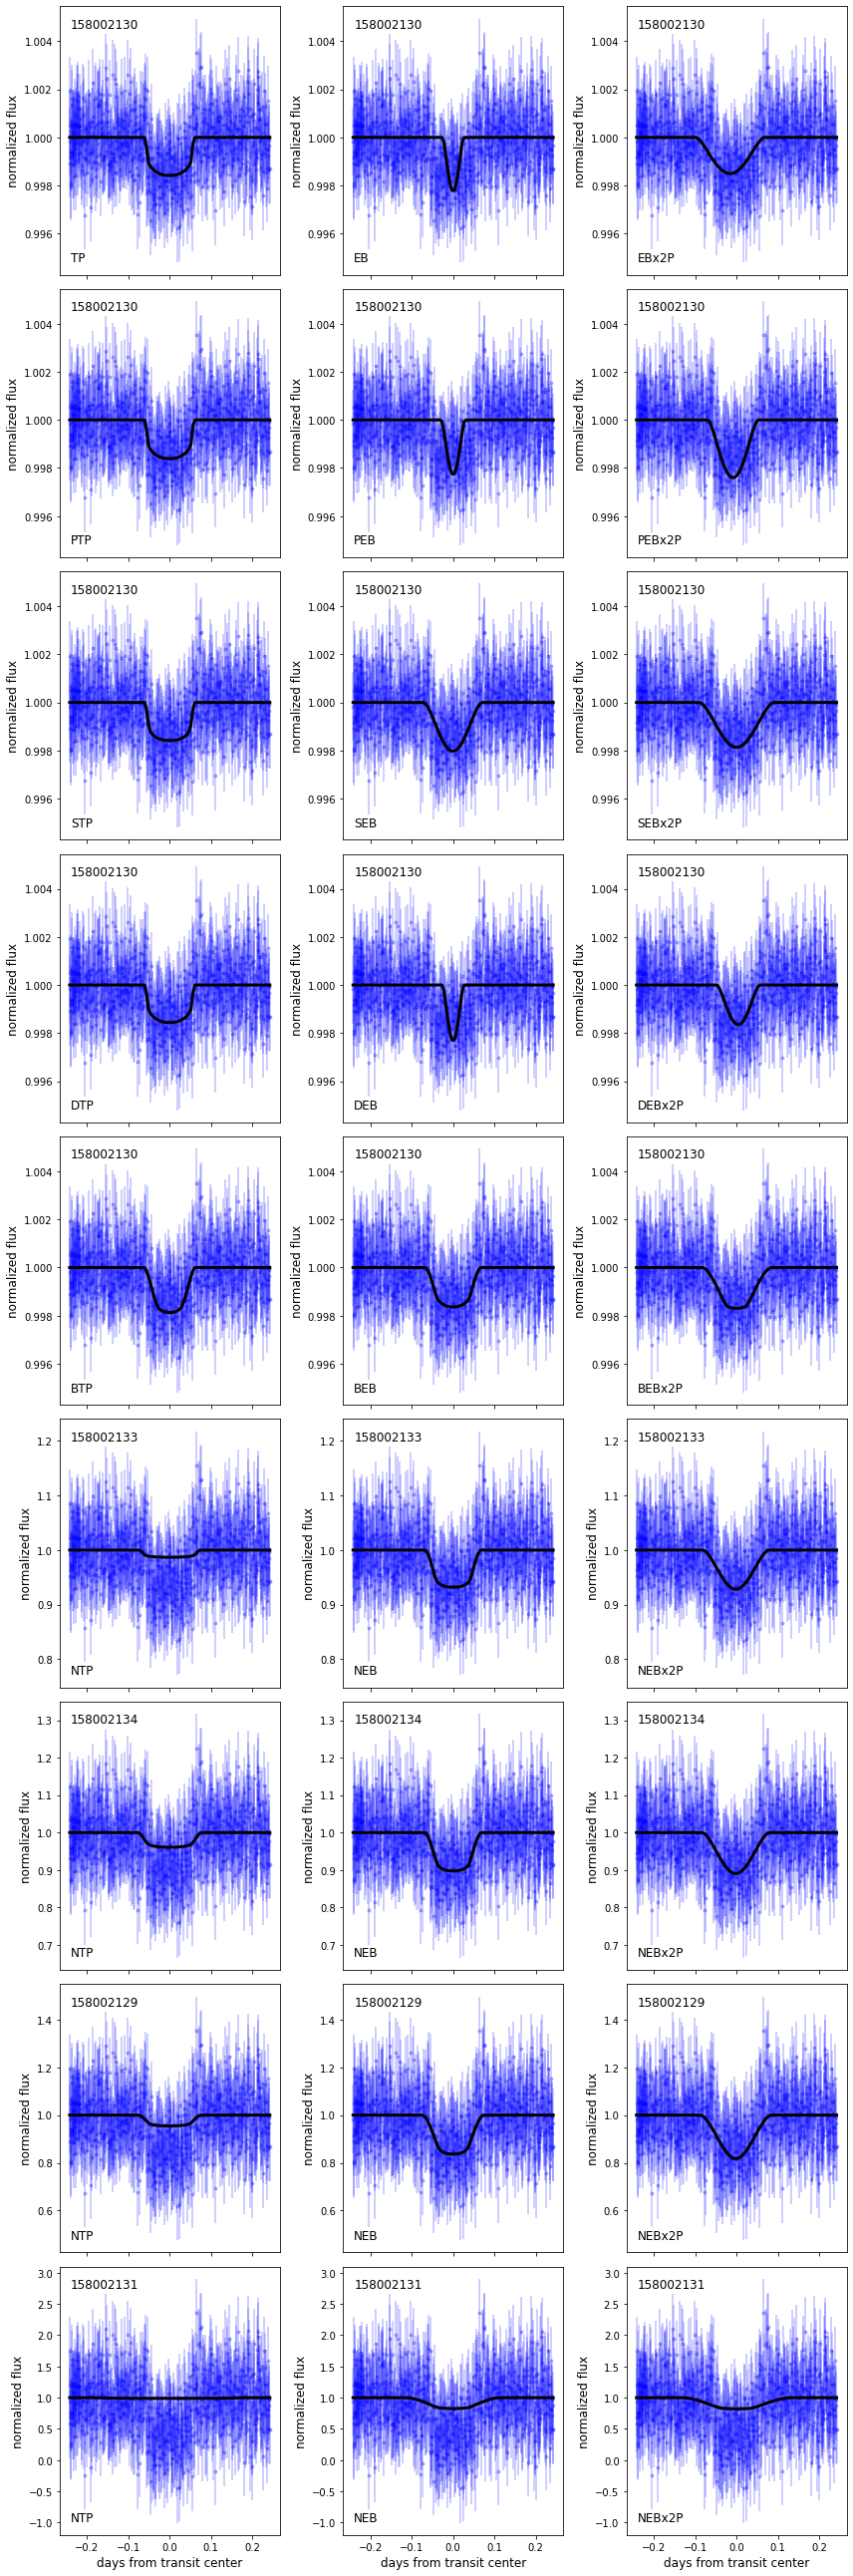

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))